# 2023-02-09

In [1]:
!pip install -U finance-datareader

In [3]:
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 26.5 MB/s eta 0:00:00
     ---------------------------------------- 233.8/233.8 kB ? eta 0:00:00
     --------------------------------------- 42.5/42.5 MB 31.2 MB/s eta 0:00:00


In [4]:
import statsmodels as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 정상성을 가진 데이터

In [8]:
np.random.seed(1004)

x = np.arange(1000)
y = np.random.normal(size = len(x))

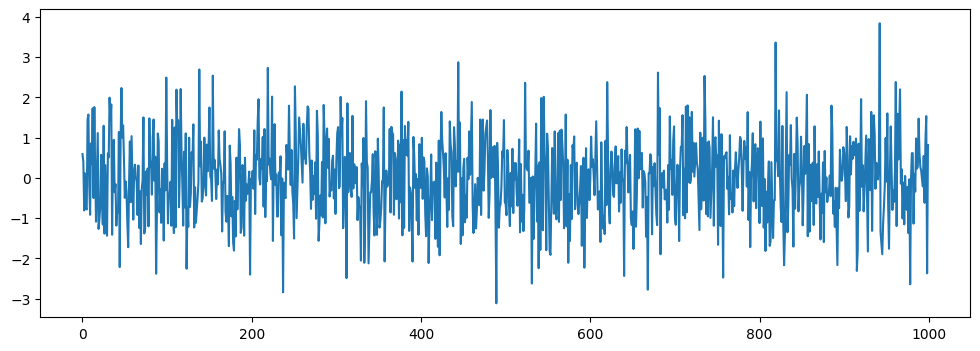

In [11]:
# 정상성을 가진 데이터로 그린 plot (자기 상관이 일정하고, 평균과 분산이 일정한 데이터)

plt.figure(figsize = (12, 4))
plt.plot(x, y)

(array([  8.,  30., 123., 215., 268., 217., 101.,  29.,   7.,   2.]),
 array([-3.11286665, -2.41717016, -1.72147367, -1.02577717, -0.33008068,
         0.36561581,  1.0613123 ,  1.75700879,  2.45270528,  3.14840177,
         3.84409826]),
 <BarContainer object of 10 artists>)

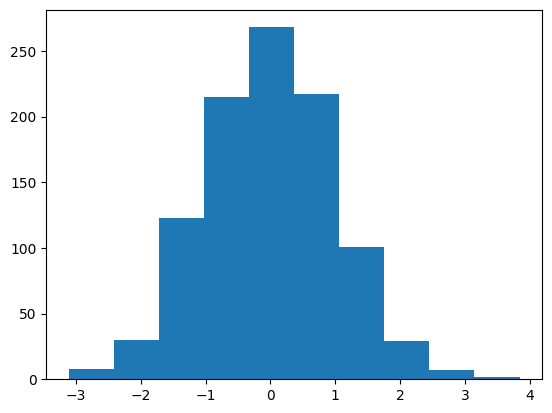

In [13]:
# hist 그래프로 표현

plt.hist(y)   # 분산이 일정하고 정규분포를 따르는 것을 확인할 수 있다.

# 2. 비정상성을 가지는 데이터

## 자기 상관 데이터

In [17]:
import FinanceDataReader as fdr

<AxesSubplot: xlabel='Date'>

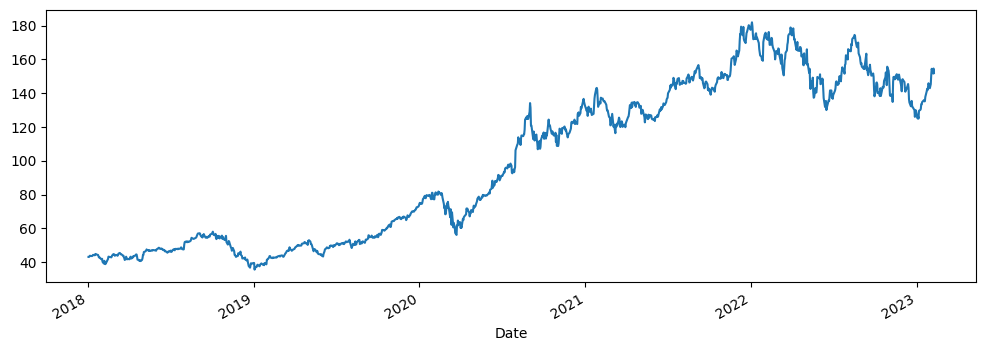

In [18]:
# 대부분의 주가 데이터 : 전 시점(전날)과 현 시점과의 연관성이 있다. -> 자기 상관성이 있다고 볼 수 있다.

df = fdr.DataReader('AAPL', '2018')
df['Close'].plot(figsize = (12, 4))

(array([294., 188., 103.,  50.,  19., 100., 160., 200.,  99.,  72.]),
 array([ 35.547501 ,  50.1937504,  64.8399998,  79.4862492,  94.1324986,
        108.778748 , 123.4249974, 138.0712468, 152.7174962, 167.3637456,
        182.009995 ]),
 <BarContainer object of 10 artists>)

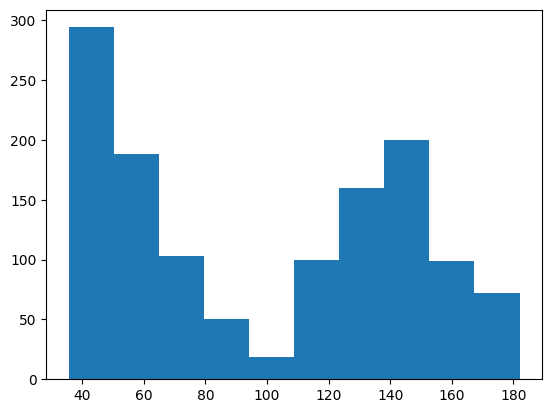

In [20]:
# 정규분포를 따르지 않는다 (비정상성을 가지는 데이터, 자기 상관성을 가지는 데이터)

plt.hist(df['Close'])

## Trend 데이터

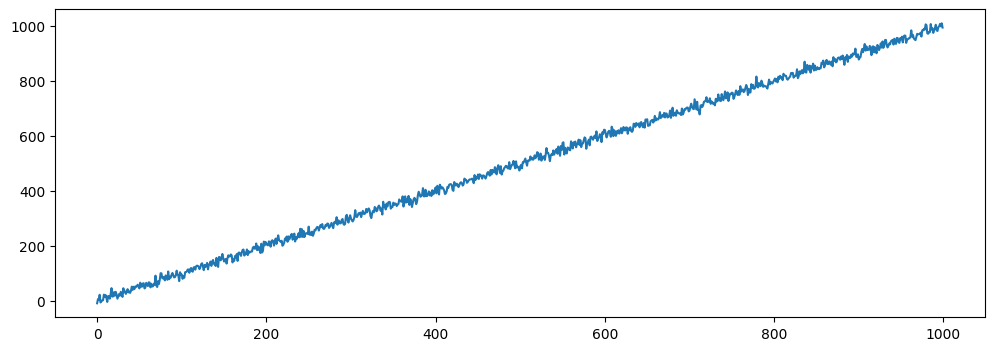

In [24]:
# trend data를 시각화

trend_data = np.array(list(range(0, 1000)))    
noise = np.random.normal(0, 10, 1000)
trend_data_noise = trend_data + noise

plt.figure(figsize = (12, 4))
plt.plot(trend_data_noise)

## 여러개의 분산을 가지는 데이터

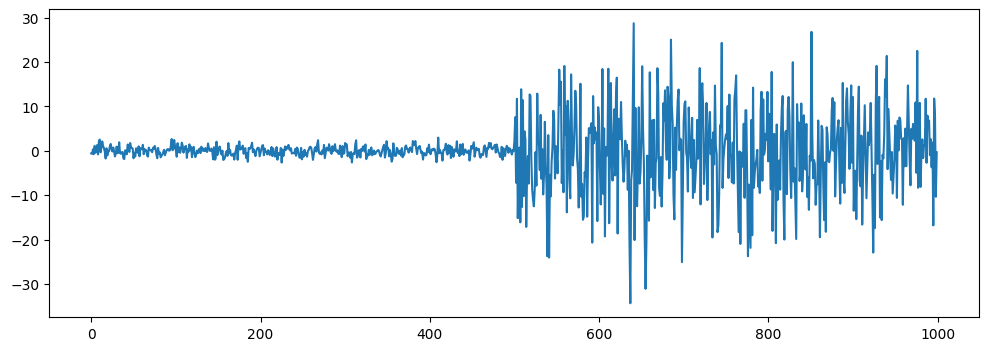

In [27]:
value1 = np.random.normal(scale = 1, size = 500)
value2 = np.random.normal(scale = 10, size = 500)
data = np.append(value1, value2)

plt.figure(figsize = (12, 4))
plt.plot(data)

## 계절성을 가지는 데이터

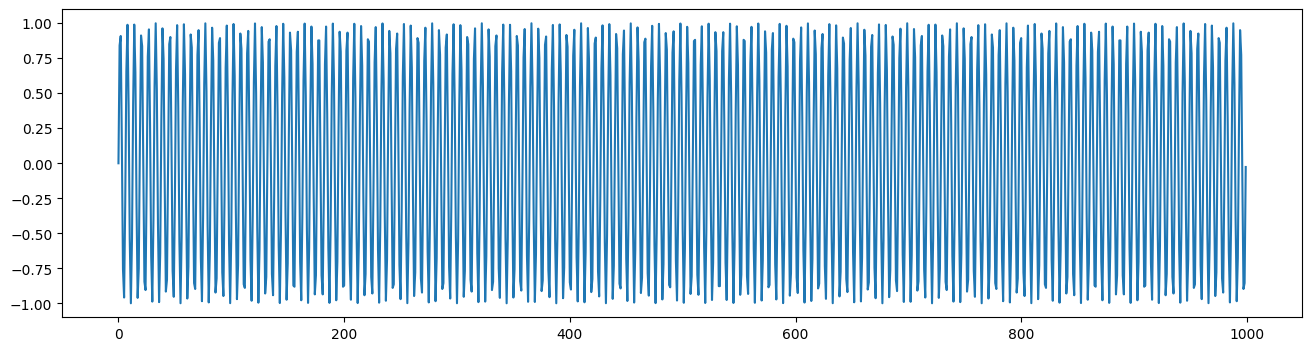

In [32]:
# sin그래프가 대표적인 계절성(주기성)을 가지는 데이터이다.

seasonality = np.sin(x)

plt.figure(figsize = (16, 4))
plt.plot(seasonality)

## Trend + Seasonality를 가지는 데이터

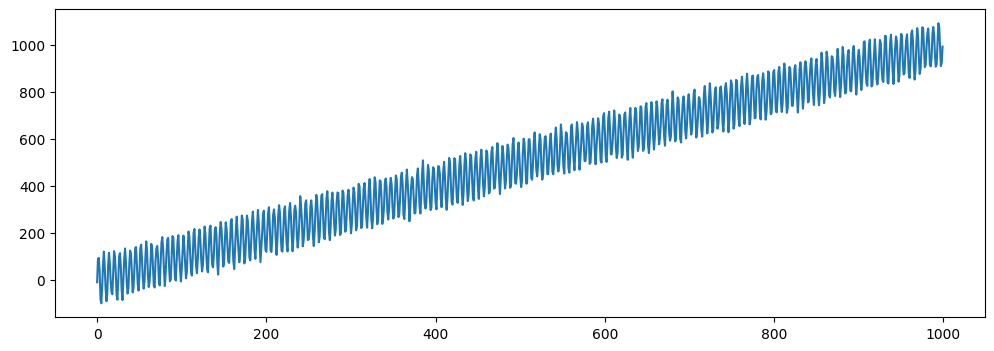

In [34]:
trend_seasonality = trend_data_noise + seasonality * 100

plt.figure(figsize = (12, 4))
plt.plot(trend_seasonality)

## 추세 전환 데이터 (국면 전환)

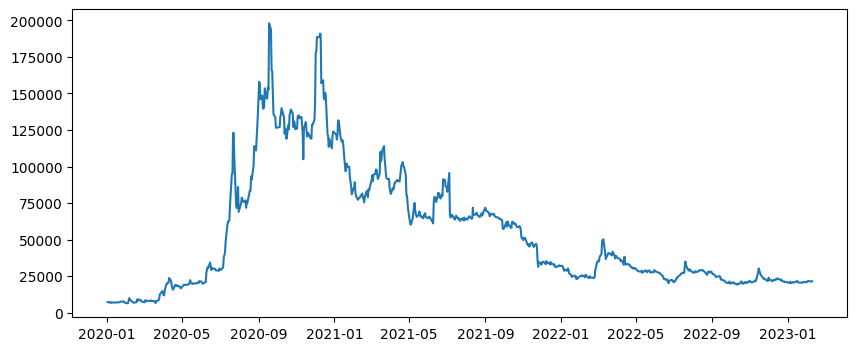

In [36]:
regime_changes_data = fdr.DataReader('019170', '2020')[['Close']]

plt.figure(figsize = (10, 4))
plt.plot(regime_changes_data)

## 비정상성을 가지는 데이터를 차분을 이용해 정상성을 가지는 데이터로 만들기

### 차분 하기 전 (plot, hist)

<AxesSubplot: xlabel='Date'>

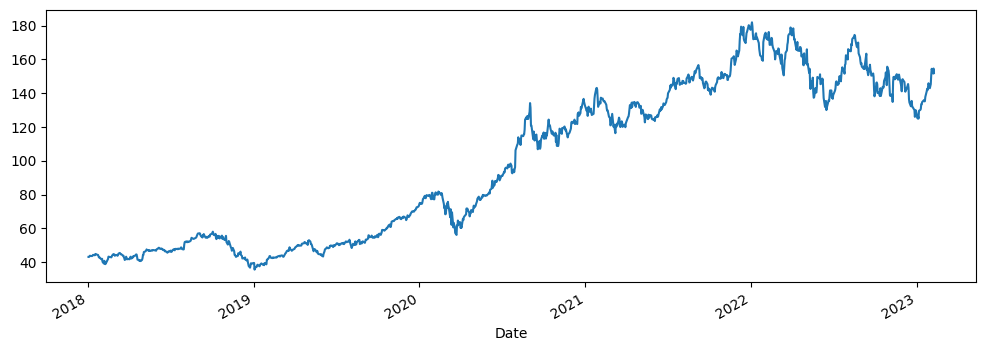

In [39]:
# 차분하기 전 (plot)

df['Close'].plot(figsize = (12, 4))

<AxesSubplot: ylabel='Frequency'>

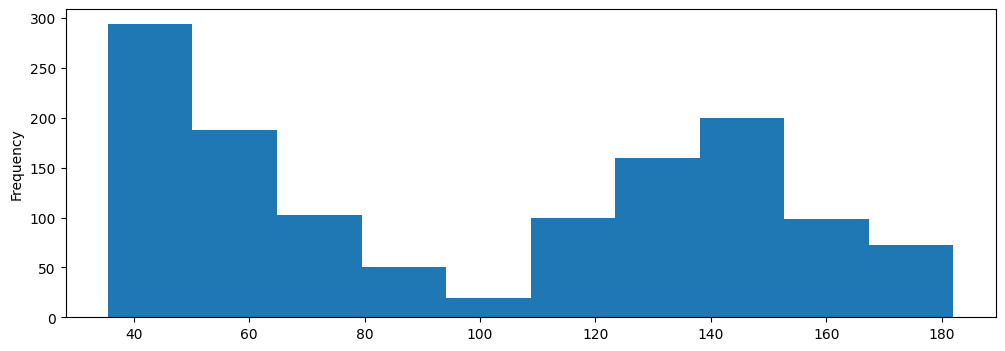

In [40]:
# 차분하기 전 (hist)

df['Close'].plot.hist(figsize = (12, 4))

### 차분 후 (plot, hist)

<AxesSubplot: xlabel='Date'>

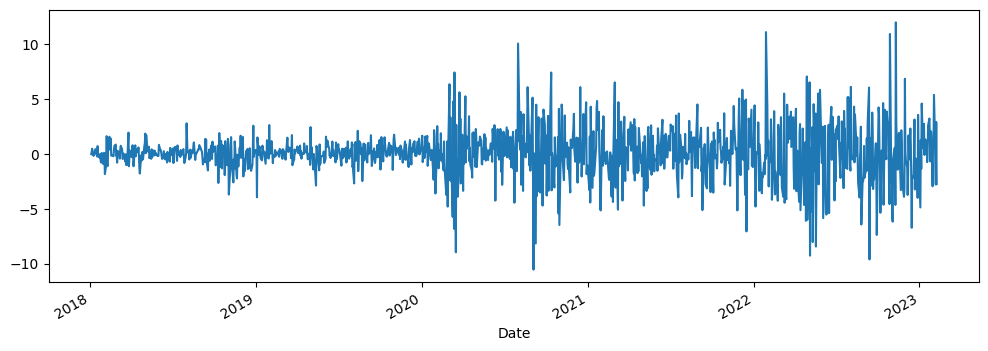

In [43]:
# 차분 후 (plot)

df['Close'].diff().plot(figsize = (12, 4))

<AxesSubplot: ylabel='Frequency'>

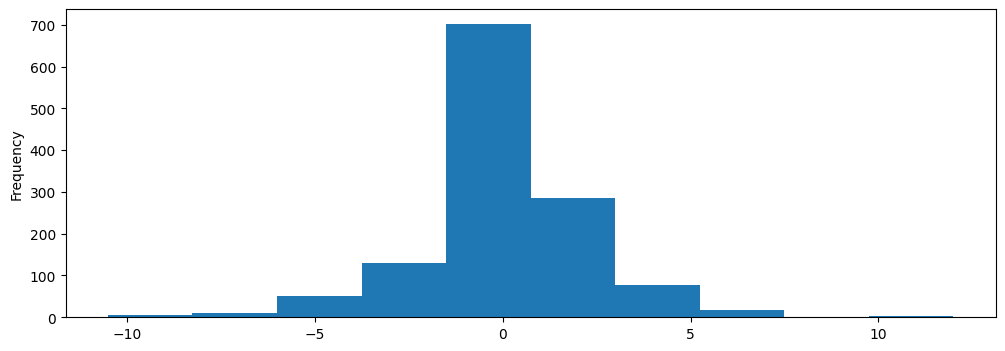

In [42]:
# 차분 후 (hist)

df['Close'].diff().plot.hist(figsize = (12, 4))

## Pandas에서 제공하는 자기상관 plot

In [44]:
# 데이터가 정상성을 가지는지, 아닌지를 판별할 수 있음

from pandas.plotting import autocorrelation_plot

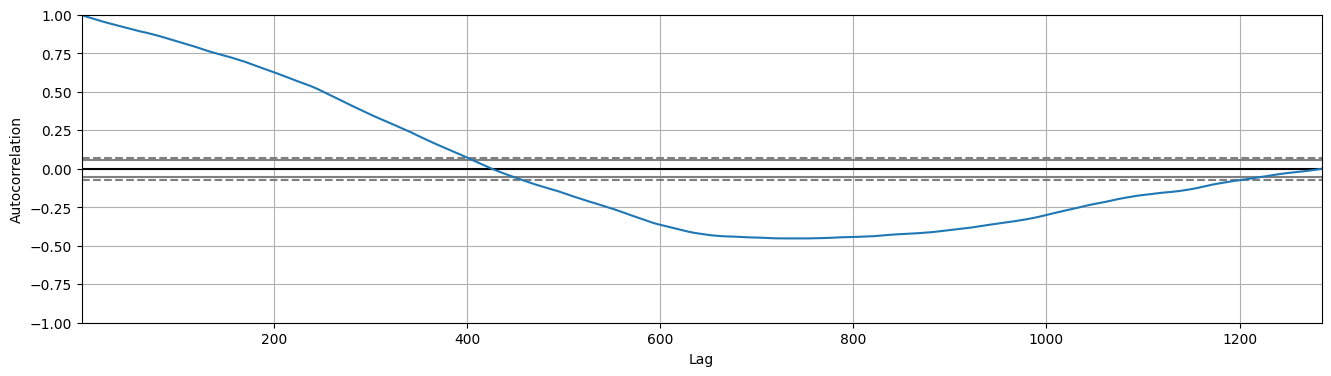

In [49]:
# 차분 전 데이터

plt.figure(figsize = (16, 4))
ax = autocorrelation_plot(df['Close'])    

(-0.15, 0.15)

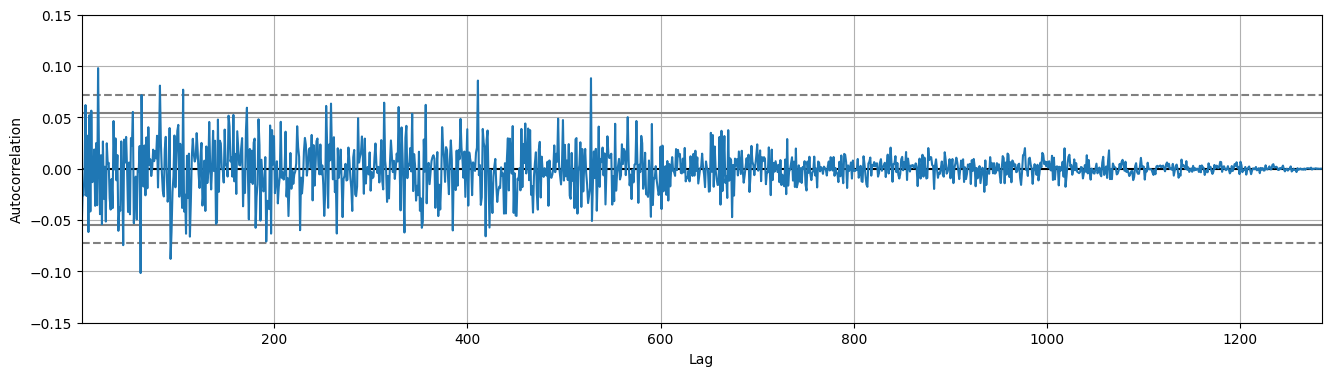

In [48]:
# 차분한 데이터 (NaN값을 날려 버림)  -> 점선은 99의 신뢰성이 / 실선이 95의 신뢰성을 가짐 -> 되도록 점선이나 실선 안에 있는 그래프일 수록 자기 상관도가 높다고 본다.

plt.figure(figsize = (16, 4))
ax = autocorrelation_plot(df['Close'].diff().dropna())        
ax.set_ylim([-0.15, 0.15])

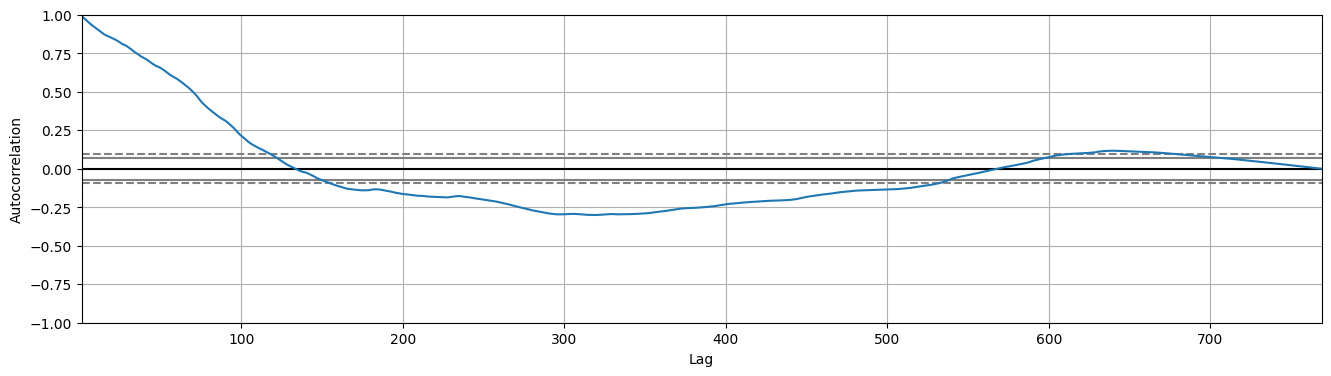

In [50]:
# 국면전환 데이터

plt.figure(figsize = (16, 4))
ax = autocorrelation_plot(regime_changes_data)

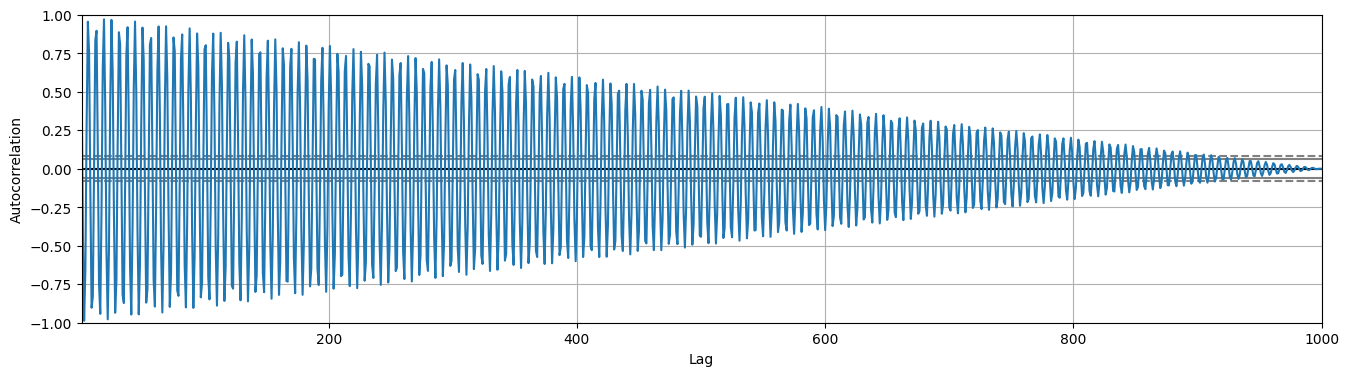

In [51]:
# Seasonality 데이터

plt.figure(figsize = (16, 4))
ax = autocorrelation_plot(seasonality)

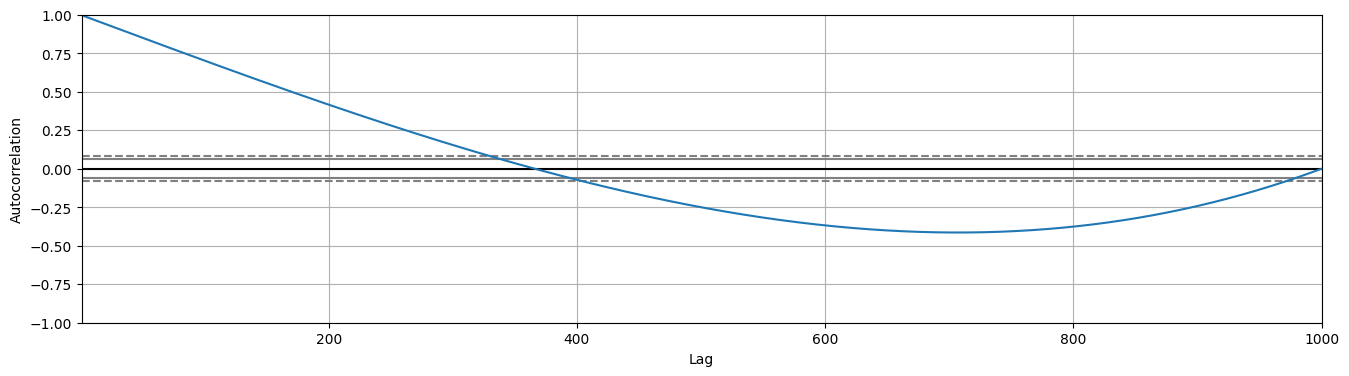

In [53]:
# trend 데이터

plt.figure(figsize = (16, 4))
ax = autocorrelation_plot(trend_data)

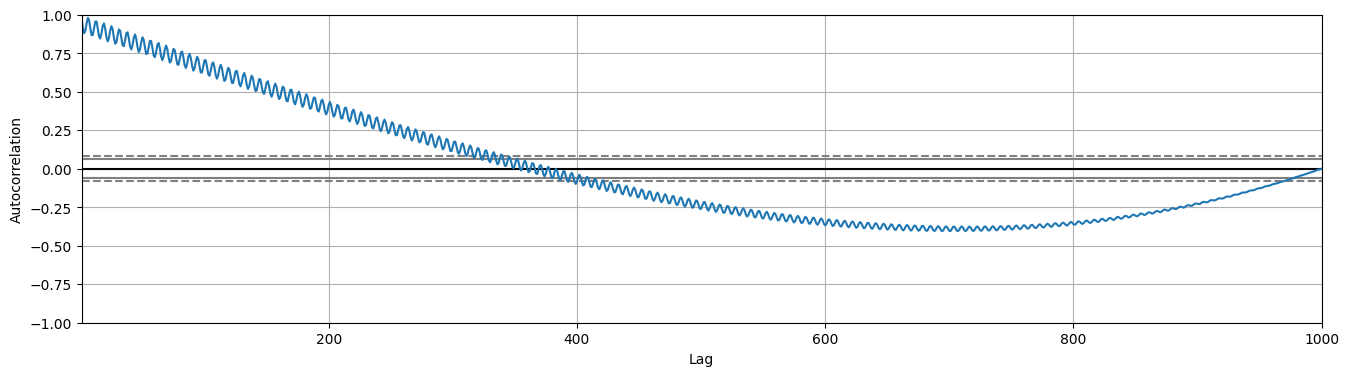

In [54]:
# trend + seasonality 데이터

plt.figure(figsize = (16,4))
ax = autocorrelation_plot(trend_seasonality)

(-0.15, 0.15)

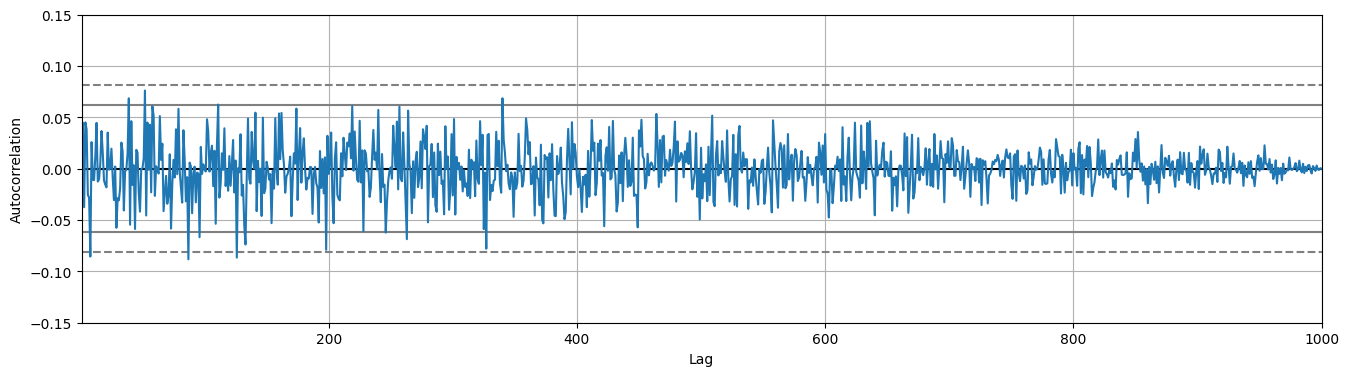

In [52]:
# 정상성을 가지는 데이터

plt.figure(figsize = (16, 4))
ax = autocorrelation_plot(y)
ax.set_ylim([-0.15, 0.15])

# Time Series Prediction (statsmodel) 

## Hodrick prescott filter

In [55]:
import numpy as np
import pandas as pd
%matplotlib inline

import statsmodels.api as sm
df = sm.datasets.macrodata.load_pandas().data
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
# print(sm.datasets.macrodata.NOTE)

In [56]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<AxesSubplot: >

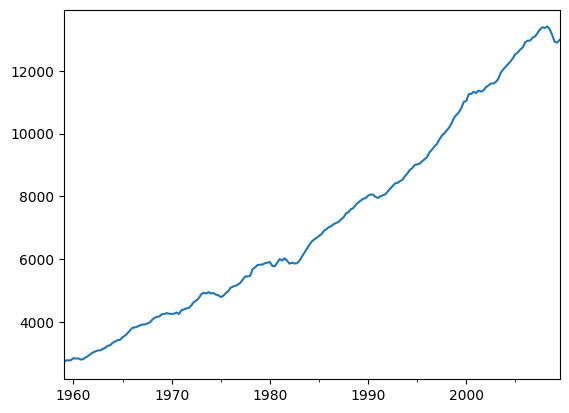

In [57]:
df['realgdp'].plot()

In [59]:
# hp_filter import

from statsmodels.tsa.filters.hp_filter import hpfilter

In [60]:
# hp_filter -> trend와 cycle로 분해

cycle, trend = hpfilter(df['realgdp'], lamb = 1600)

In [61]:
# 필터로 나온 분화시킨 trend를 기본 데이터를 concat하여 합침

gdp = pd.concat([df['realgdp'], trend], axis = 1)
gdp.head()

,realgdp,realgdp_trend
1959-03-31,2710.349,2670.837085
1959-06-30,2778.801,2698.712468
1959-09-30,2775.488,2726.612545
1959-12-31,2785.204,2754.612067
1960-03-31,2847.699,2782.816333


<AxesSubplot: >

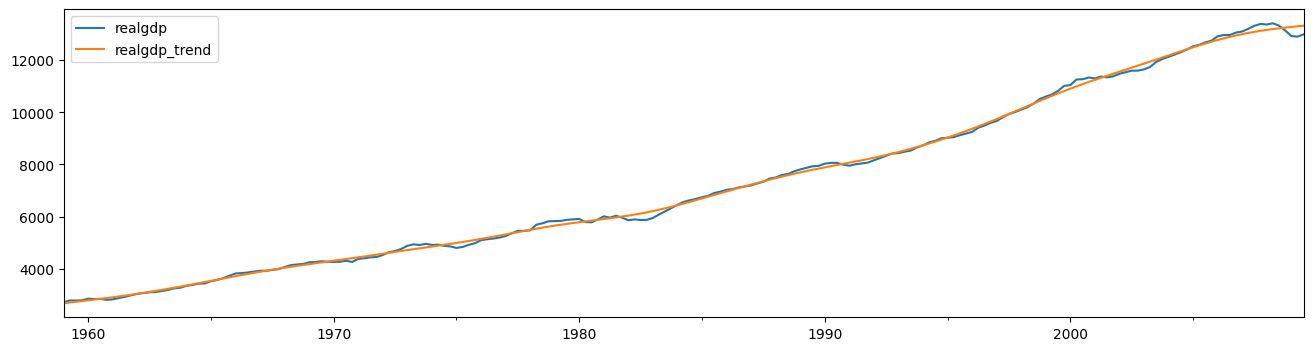

In [63]:
# trend와 시계열 원본 데이터를 확인하기 위해 plot을 그림

gdp.plot(figsize = (16, 4))

<AxesSubplot: >

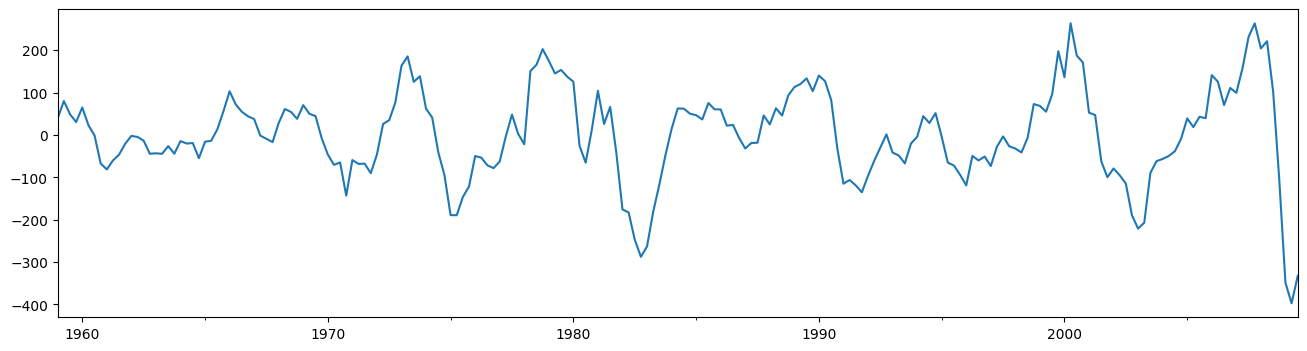

In [64]:
# cycle plot

cycle.plot(figsize = (16, 4))

## ETS Models

In [65]:
import pandas as pd
import numpy as np

In [74]:
# csv파일을 불러오면서 index를 'Month'로 명시하고 datetime자료형으로 지정

airline = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot: xlabel='Month'>

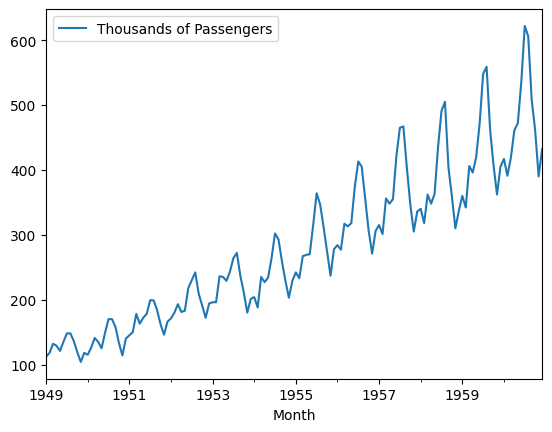

In [75]:
airline.plot()      # trend와 seasonality가 있는 데이터로 확인할 수 있음

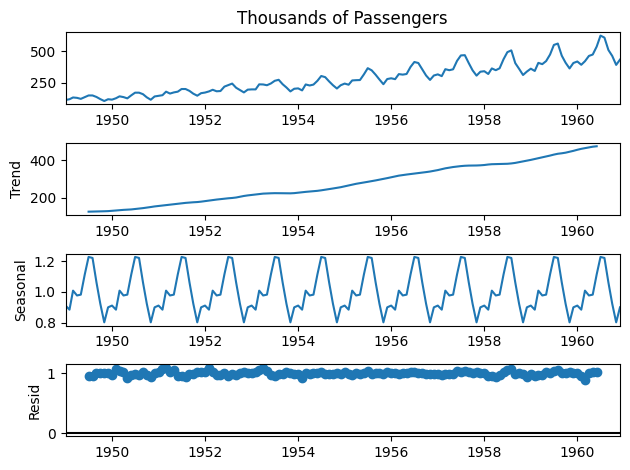

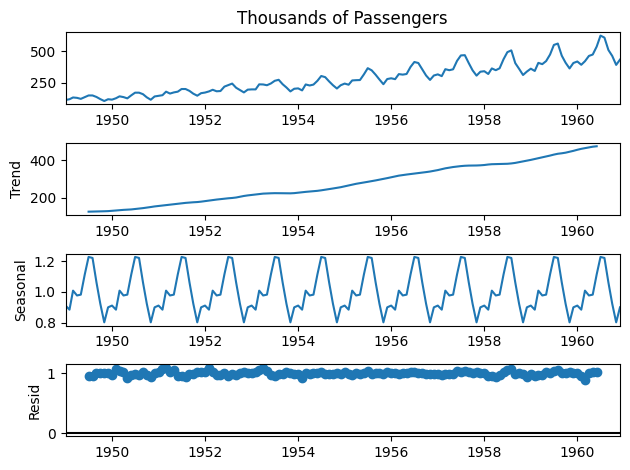

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(airline['Thousands of Passengers'], model = 'multiplcative')
result.plot()

## EWMA (지수가중이동평균)

In [77]:
import FinanceDataReader as fdr

In [79]:
vivo = fdr.DataReader('082800', '2018')[['Close']]
vivo.head()

,Close
Date,
2018-01-02,1035
2018-01-03,1045
2018-01-04,1040
2018-01-05,1060
2018-01-08,1065


In [81]:
# 일반 이동평균

vivo['MA6'] = vivo['Close'].rolling(window = 6).mean()
vivo['MA12'] = vivo['Close'].rolling(window = 12).mean()

<AxesSubplot: xlabel='Date'>

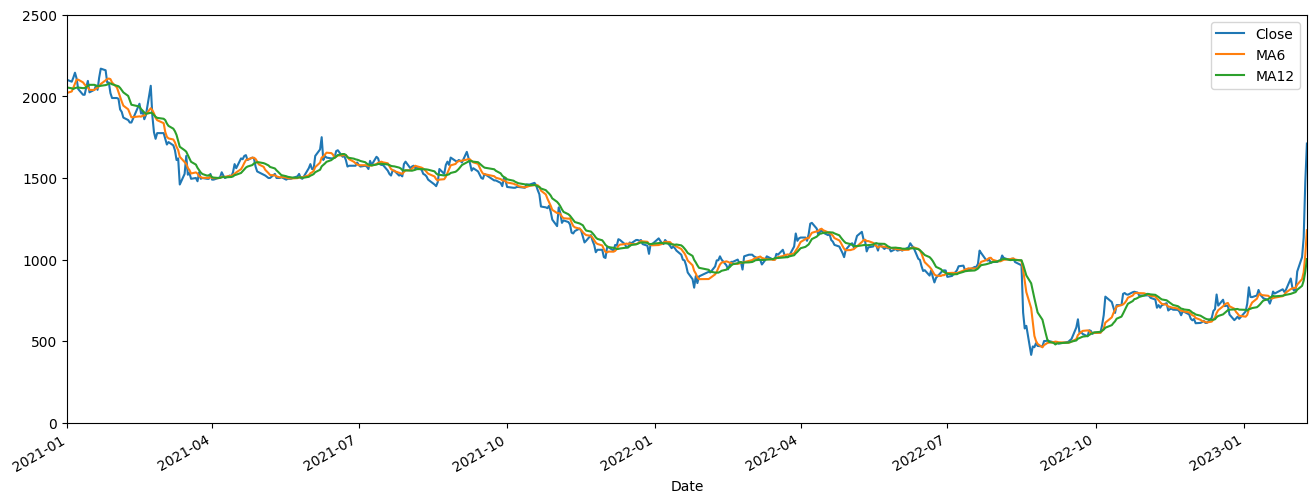

In [84]:
# '2021-01-01'부터 '2023-02-09'까지의 6일 및 12일 이동평균

vivo.plot(figsize = (16, 6), xlim = ['2021-01-01', '2023-02-09'], ylim = [0, 2500])

In [86]:
# span = 12, 12일 EWMA (지수가중이동평균)

vivo['EWMA12'] = vivo['Close'].ewm(span = 12, adjust = False).mean()

<AxesSubplot: xlabel='Date'>

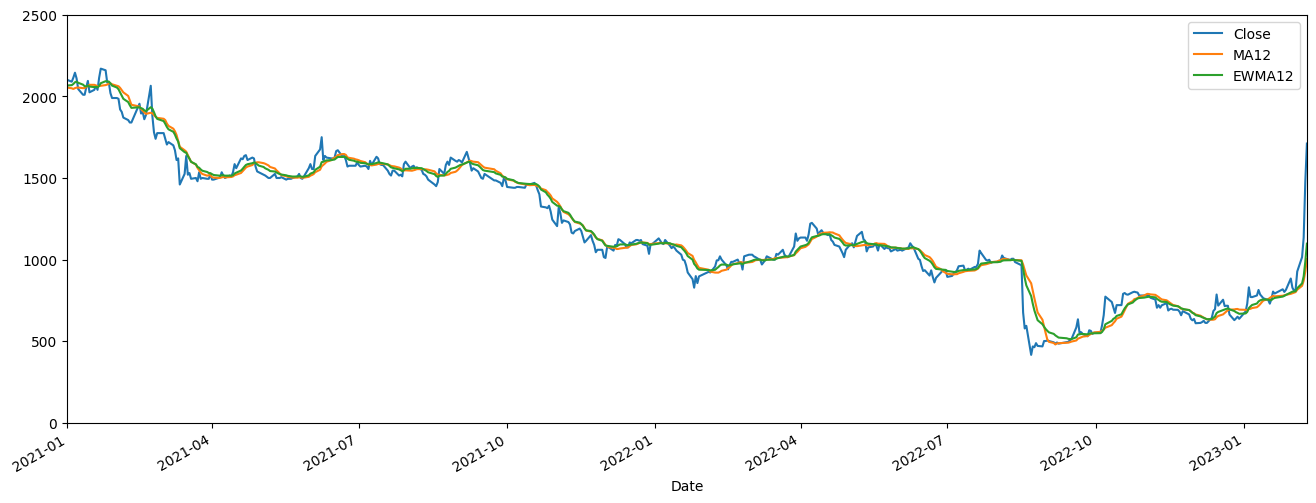

In [87]:
# 21년 1월 1일부터, 23년 2월 9일까지 종가와 이동평균 12와 EWMA12 비교

vivo[['Close', 'MA12', 'EWMA12']].plot(figsize = (16, 6), xlim = ['2021-01-01', '2023-02-09'], ylim = [0, 2500])

## Holt-Winters methods

In [89]:
# airline 데이터의 index의 frequency를 'MS'로 설정

airline.index.freq = 'MS'
airline.index 

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [92]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [100]:
# 지수평활

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha = 2/(span+1)

model = SimpleExpSmoothing(airline['Thousands of Passengers']).fit(smoothing_level = alpha, optimized = False)
airline['SES12'] = model.fittedvalues.shift(-1)
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(alpha = alpha, adjust = False).mean()
airline.head()

,Thousands of Passengers,SES12,EWMA12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


<AxesSubplot: xlabel='Month'>

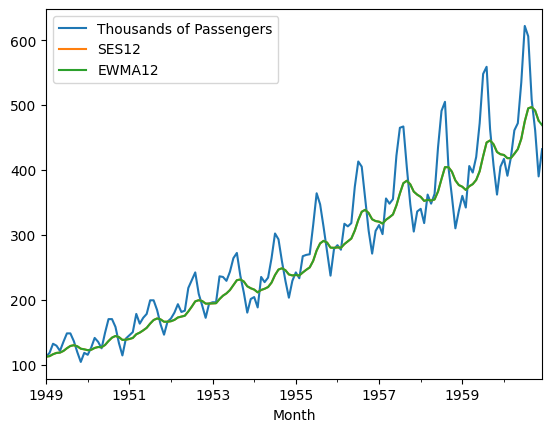

In [101]:
# 지수가중이동평균과 평활지수 비교

airline.plot()

In [103]:
# 이중지수평활

from statsmodels.tsa.holtwinters import ExponentialSmoothing

airline['EXPadd12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'add').fit().fittedvalues
airline

,Thousands of Passengers,SES12,EWMA12,EXPadd12
Month,,,,
1949-01-01,112,112.000000,112.000000,120.527273
1949-02-01,118,112.923077,112.923077,114.102394
1949-03-01,132,115.857988,115.857988,120.040657
1949-04-01,129,117.879836,117.879836,134.001539
1949-05-01,121,118.359861,118.359861,131.085845
...,...,...,...,...
1960-08-01,606,494.898619,494.898619,623.656106
1960-09-01,508,496.914216,496.914216,608.168786
1960-10-01,461,491.388952,491.388952,510.571382


<AxesSubplot: xlabel='Month'>

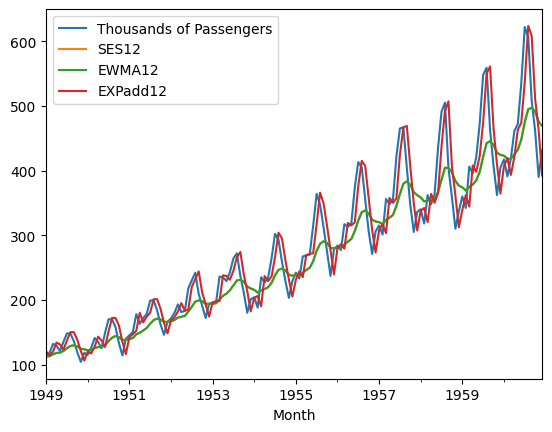

In [104]:
airline.plot()

In [105]:
airline['EXPmul'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'mul').fit().fittedvalues
airline.head()

,Thousands of Passengers,SES12,EWMA12,EXPadd12,EXPmul
Month,,,,,
1949-01-01,112,112.000000,112.000000,120.527273,120.527273
1949-02-01,118,112.923077,112.923077,114.102394,113.990701
1949-03-01,132,115.857988,115.857988,120.040657,120.031669
1949-04-01,129,117.879836,117.879836,134.001539,134.235979
1949-05-01,121,118.359861,118.359861,131.085845,131.270786


<AxesSubplot: xlabel='Month'>

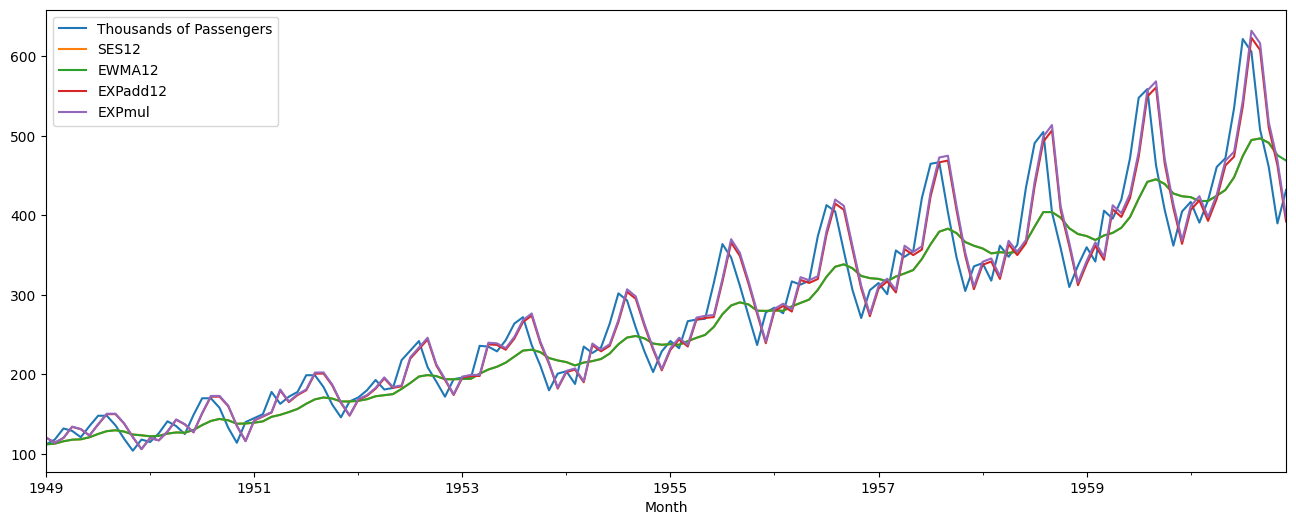

In [106]:
airline.plot(figsize = (16, 6))

<AxesSubplot: xlabel='Month'>

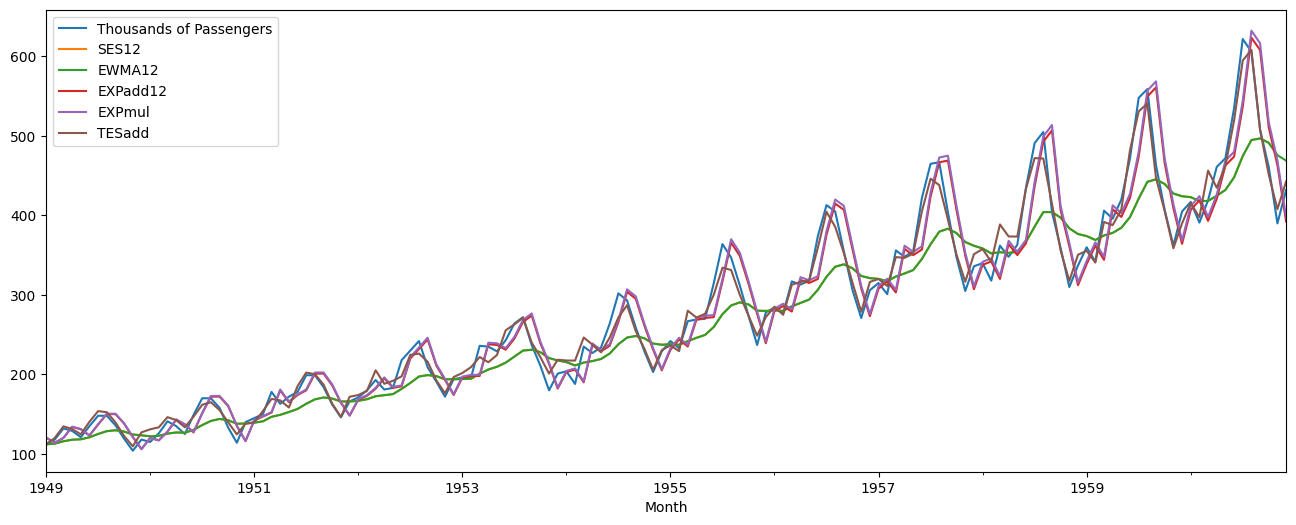

In [108]:
# 삼중지수평활

airline['TESadd'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'add', seasonal = 'add').fit().fittedvalues
airline.plot(figsize = (16, 6))

C:\Users\GM220808\.venv\Practice1\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot: xlabel='Month'>

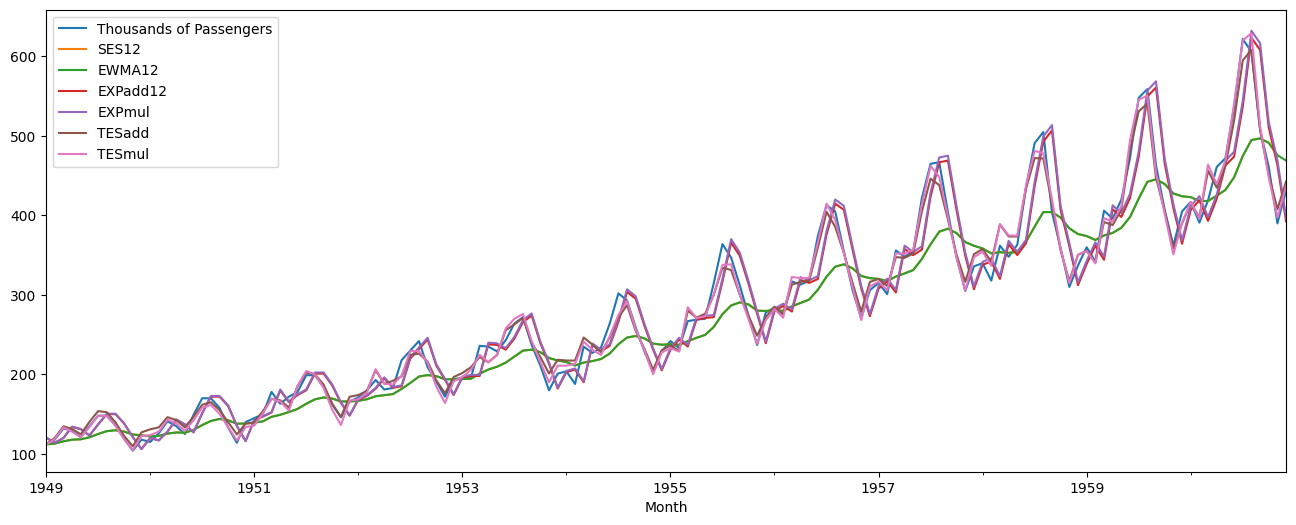

In [109]:
airline['TESmul'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'mul', seasonal = 'mul').fit().fittedvalues
airline.plot(figsize = (16, 6))

<AxesSubplot: xlabel='Month'>

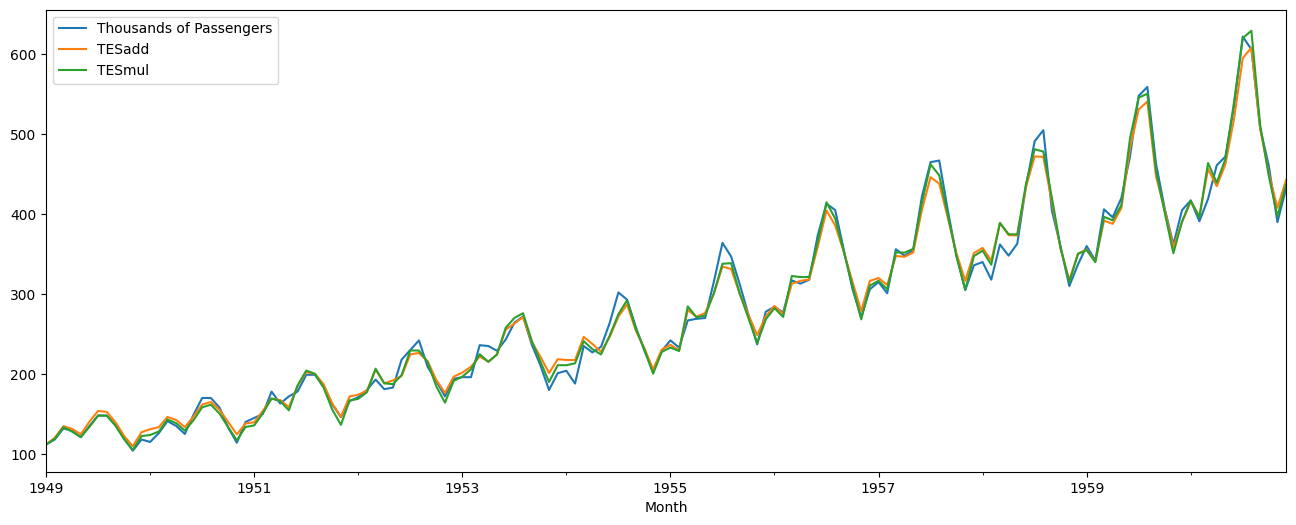

In [110]:
# 삼중지수평활 변수들의 plot

airline[['Thousands of Passengers', 'TESadd', 'TESmul']].plot(figsize = (16, 6))

## [실습]

In [145]:
df = pd.read_csv('EnergyProduction.csv', index_col = 0, parse_dates = True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


### 1. DatetimeIndex에 'MS'의 frequency를 할당합니다.

In [146]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### 2. dataset Plot

<AxesSubplot: xlabel='DATE'>

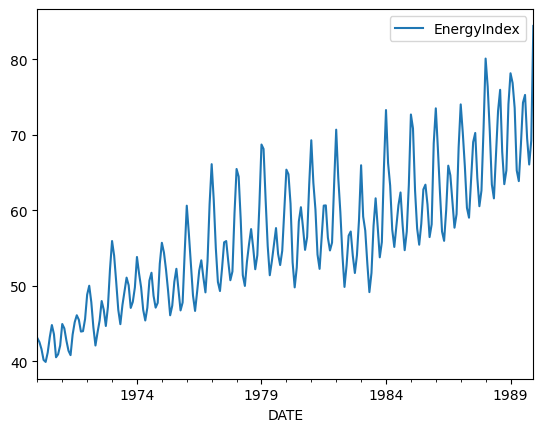

In [147]:
df.plot()

### 3. Simple Moving Average
 - Add a column (12-month Simple Moving Average[SMA])
Plotting

<AxesSubplot: xlabel='DATE'>

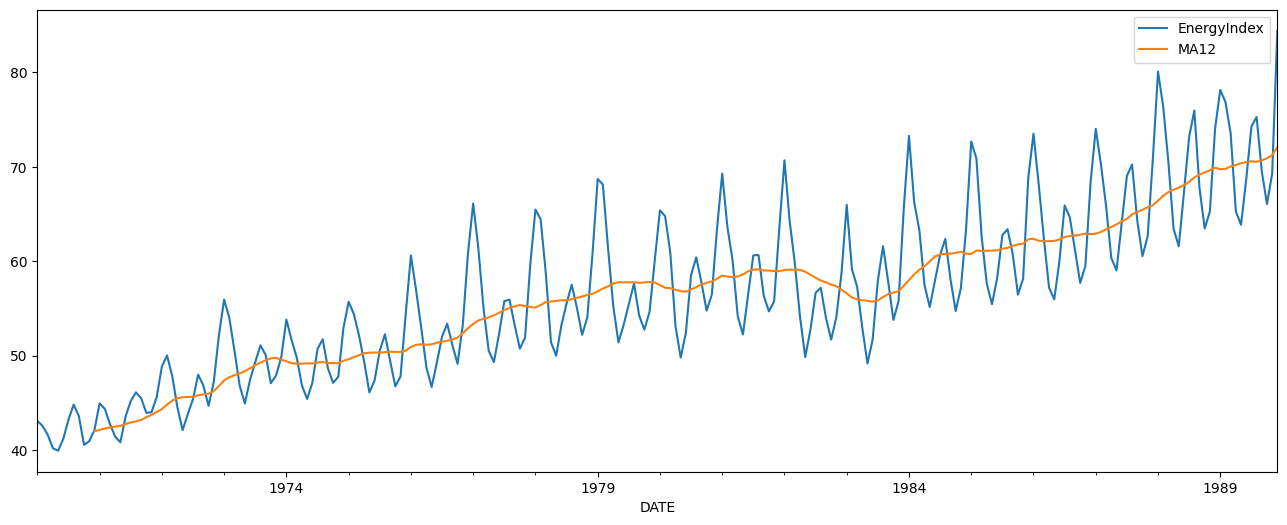

In [148]:
df['MA12'] = df['EnergyIndex'].rolling(12).mean()
df.plot(figsize = (16, 6))

### 4. Exponentially Weighted Moving Average

- statsmodels SimpleExpSmoothing을 사용하여 span이 12인 Exponentially Weighted Moving Average(EWMA)을 표시하는 column을 추가
- Plotting

<AxesSubplot: xlabel='DATE'>

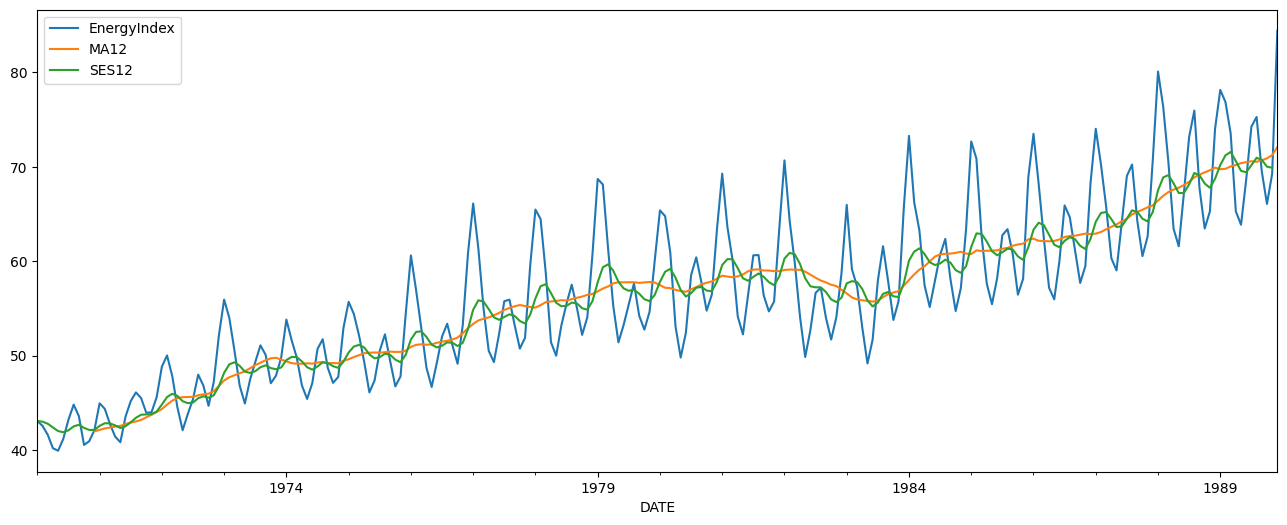

In [149]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha = 2/(span+1)

model = SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level = alpha, optimized = False)
df['SES12'] = model.fittedvalues.shift(-1)

df.plot(figsize = (16, 6))

### 5. Triple Exponential Smoothing(multiplicative)
 - Triple Exponential Smoothing을 사용하여 Column으로 DataFrame에 추가합니다.
 - Plotting

<AxesSubplot: xlabel='DATE'>

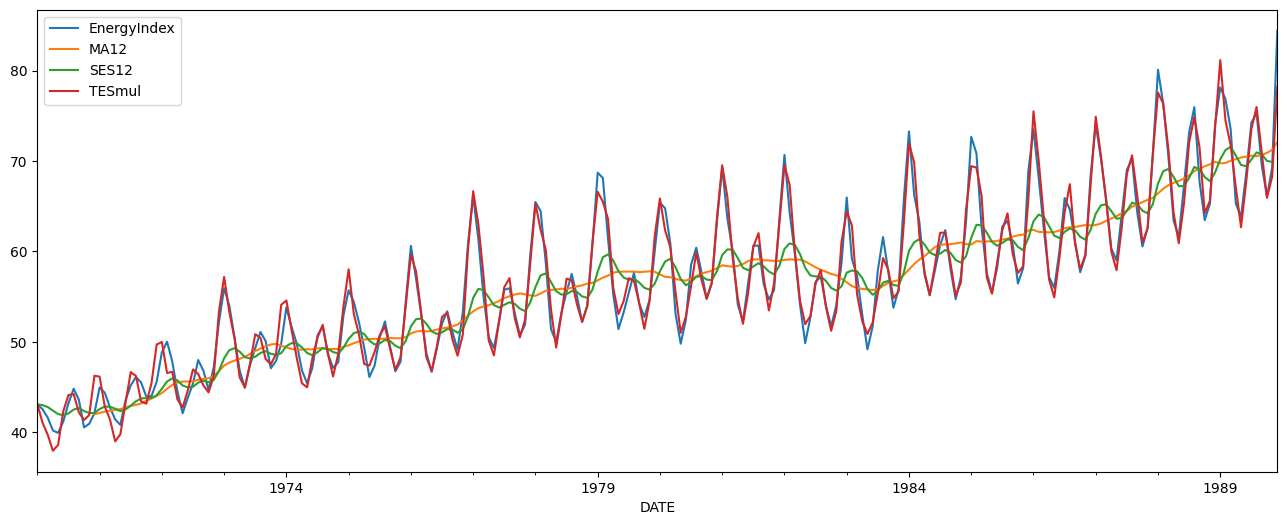

In [150]:
df['TESmul'] = ExponentialSmoothing(df['EnergyIndex'], trend = 'mul', seasonal = 'mul', seasonal_periods = 12).fit().fittedvalues
df.plot(figsize = (16, 6))